# Avaliação de respostas de LLMs

ref.: 
https://github.com/Tiiiger/bert_score/blob/master/example/Demo.ipynb

In [12]:
from bert_score import score
from bert_score import plot_example

import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

## Lê os arquivos de referência e de respostas de LLMs

In [3]:
with open("hyps.txt") as f:
    cands = [line.strip() for line in f]

with open("refs.txt") as f:
    refs = [line.strip() for line in f]

In [6]:
cands[1]

'A 28-year-old chef who recently moved to San Francisco was found dead in the staircase of a local shopping center.'

In [8]:
refs[1]

'A 28-year-old chef who had recently moved to San Francisco was found dead in the stairwell of a local mall this week.'

## Fazendo as avaliações

In [9]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)

C:\Users\leona\Documents\GitHub\ollama_tests\.venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\leona\.cache\huggingface\hub\models--roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\leona\Documents\GitHub\ollama_tests\.venv\Lib\site-packages\transformers\tokenization_utils_base

calculating scores...
computing bert embedding.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.26s/it]


computing greedy matching.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 123.16it/s]

done in 1.28 seconds, 7.83 sentences/sec


In [11]:
P, R, F1

(tensor([0.9843, 0.9832, 0.9120, 0.9577, 0.9603, 0.9674, 0.9526, 0.9666, 0.9393,
         0.9505]),
 tensor([0.9824, 0.9733, 0.9204, 0.9601, 0.9748, 0.9686, 0.9680, 0.9660, 0.9485,
         0.9512]),
 tensor([0.9834, 0.9782, 0.9162, 0.9589, 0.9675, 0.9680, 0.9602, 0.9663, 0.9438,
         0.9508]))

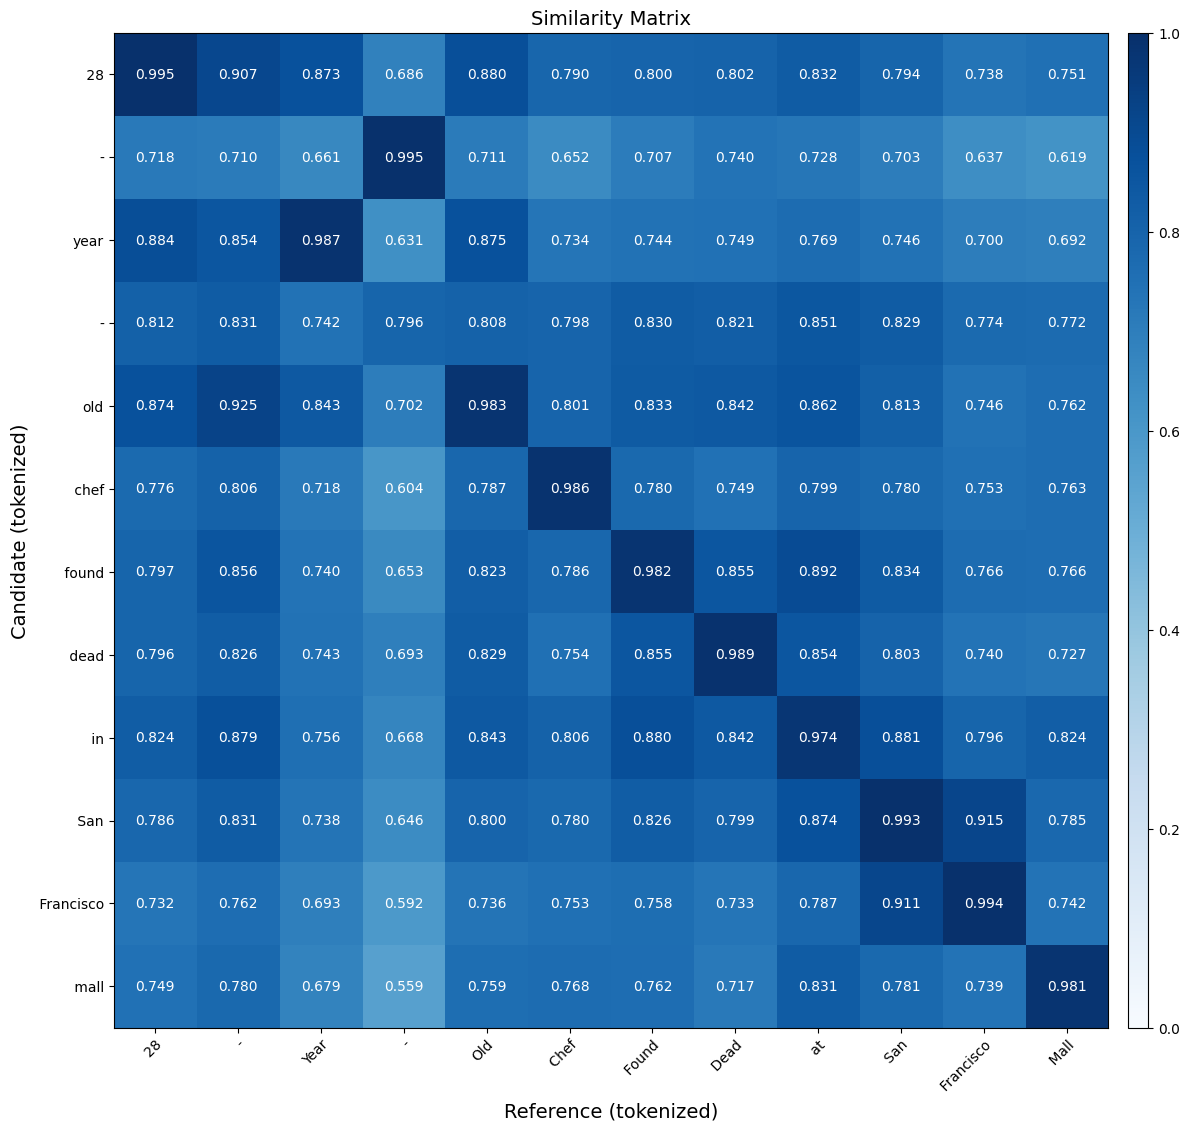

In [13]:
plot_example(cands[0], refs[0], lang="en")

## Testando avaliações em Português

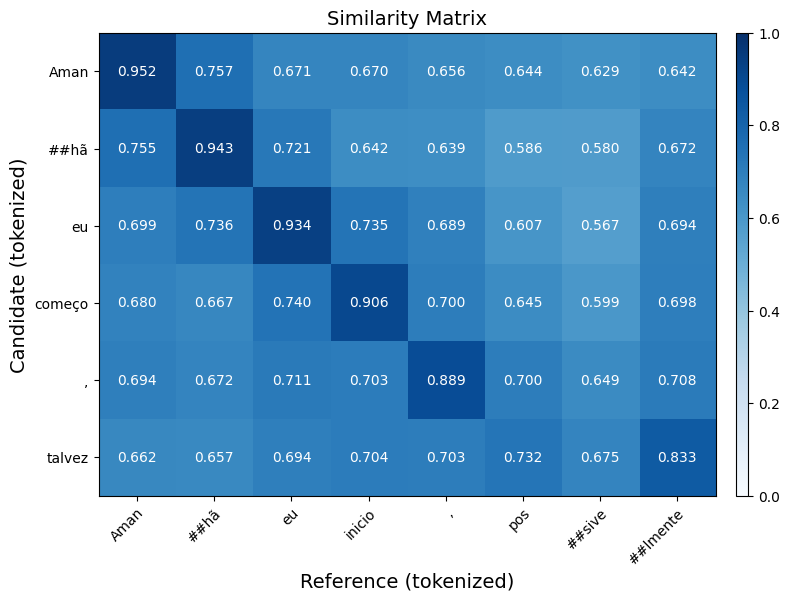

In [32]:
cands = [
    'Amanhã eu começo, talvez'
]

refs = [
    'Amanhã eu inicio, possivelmente'
]
plot_example(cands[0], refs[0], lang="pt-br")

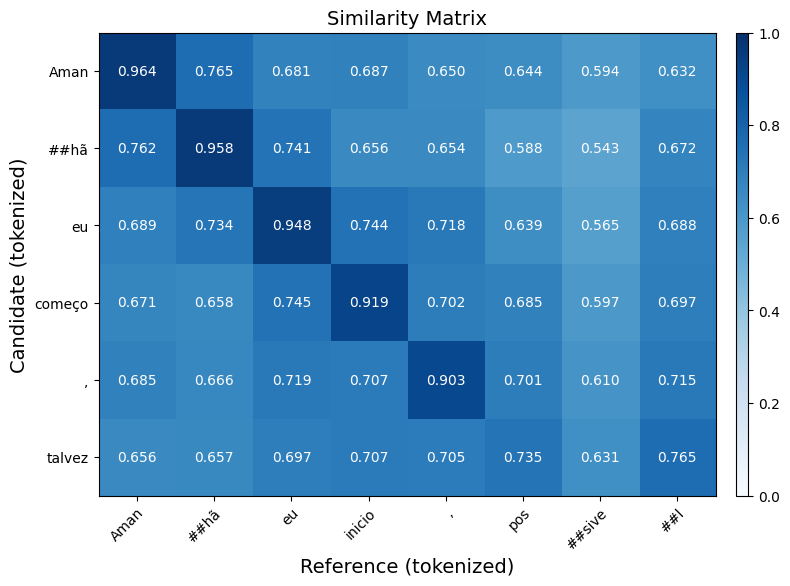

In [30]:
P, R, F1 = score(cands, refs, lang='en', verbose=False)
P, R, F1

C:\Users\leona\Documents\GitHub\ollama_tests\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(tensor([0.8917]), tensor([0.8943]), tensor([0.8930]))